In [1]:
import pandas as pd

In [2]:
df_rfm = pd.read_csv('df_rfm.csv')

In [5]:
df_rfm.columns

Index(['Customer ID', 'NombreCommandes', 'NombreArticles',
       'DateDerniereCommande', 'MontantTotal', 'CommandesAnnulees',
       'PanierMoyen', 'Recency', 'NombreArticlesMoyenParCommande'],
      dtype='object')

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

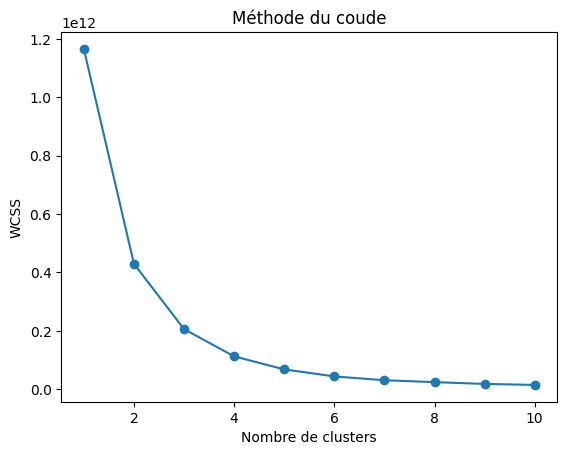

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler


variables = ['NombreCommandes', 'MontantTotal','Recency']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables pour la segmentation
variables = ['NombreCommandes', 'MontantTotal', 'Recency']
# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre de clusters (k)
k = 3

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Ajouter les informations de segmentation au dataframe d'origine
df_rfm['Segment'] = kmeans.labels_

# Analyser les caractéristiques des clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)
print(df_cluster_centers)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   NombreCommandes   MontantTotal     Recency
0         6.210768    3100.248750   63.137987
1       118.416667  152506.102917   17.791667
2         2.008310     736.824310  455.655402


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

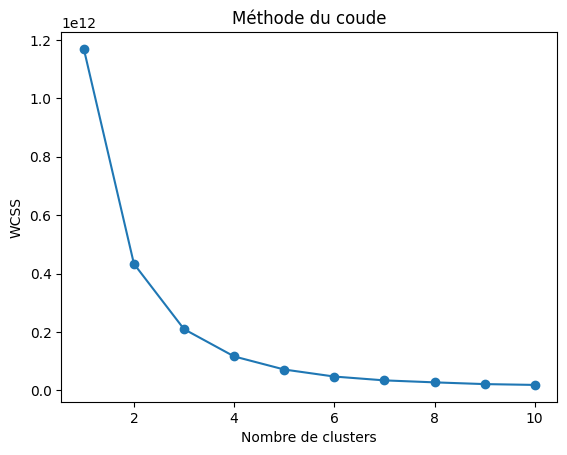

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


variables = ['NombreCommandes', 'NombreArticles','MontantTotal',
       'PanierMoyen', 'Recency', 'NombreArticlesMoyenParCommande']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables pour la segmentation
variables = ['NombreCommandes', 'NombreArticles','MontantTotal',
       'PanierMoyen', 'Recency', 'NombreArticlesMoyenParCommande']
# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre de clusters (k)
k = 3

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Ajouter les informations de segmentation au dataframe d'origine
df_rfm['Segment'] = kmeans.labels_

# Analyser les caractéristiques des clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)
print(df_cluster_centers)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   NombreCommandes  NombreArticles   MontantTotal  PanierMoyen     Recency  \
0         1.939144       32.507994     646.089324   327.506393  436.537906   
1         6.602632      109.152618    3429.917889   544.903702   58.655839   
2       138.933333     1070.333333  196508.650000  1877.460745   22.400000   

   NombreArticlesMoyenParCommande  
0                       18.599689  
1                       23.863973  
2                        8.370178  


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



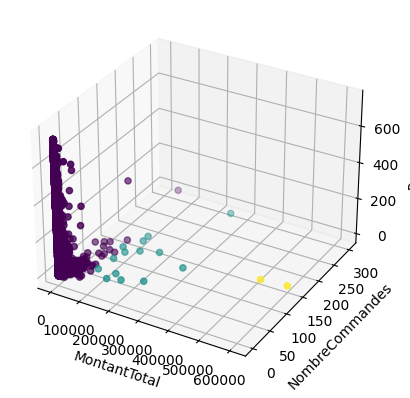

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


variables = ['NombreCommandes', 'MontantTotal','Recency']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer K-means pour obtenir les clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtenir les labels des clusters
labels = kmeans.labels_

# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de données avec les couleurs des clusters
ax.scatter(X['MontantTotal'], X['NombreCommandes'], X['Recency'], c=labels, cmap='viridis')

# Ajouter des labels aux axes
ax.set_xlabel('MontantTotal')
ax.set_ylabel('NombreCommandes')
ax.set_zlabel('Recency')

# Afficher la figure
plt.show()


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


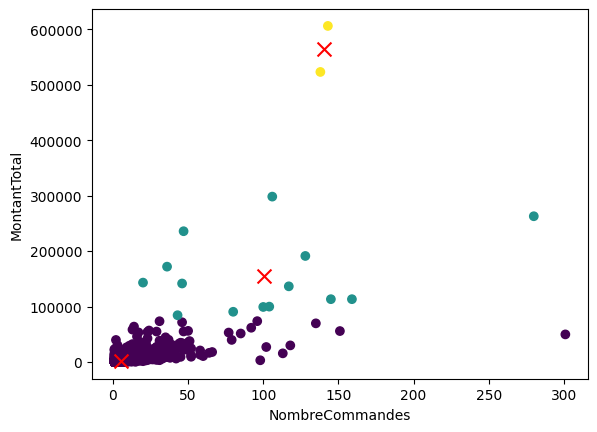

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


variables = ['NombreCommandes', 'MontantTotal']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Appliquer K-means pour obtenir les clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtenir les labels des clusters
labels = kmeans.labels_

# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_




# Tracer les points de données avec les couleurs des clusters
plt.scatter(X['NombreCommandes'], X['MontantTotal'], c=labels, cmap='viridis',rasterized=False)

# Tracer les centroïdes des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

# Ajouter des labels aux axes
plt.xlabel('NombreCommandes')
plt.ylabel('MontantTotal')

# Afficher la figure
plt.show()


In [14]:
import plotly.express as px
df_rfm["Segment"] = df_rfm["Segment"].astype(str) #convert to string
fig = px.scatter_3d(df_rfm, x='Recency', y='NombreCommandes', z='MontantTotal',
              color='Segment')
fig.update_layout(width=800, height=600)
fig.show()